In [1]:
import os
import matplotlib.pyplot as plt  # to visualize data and draw plots
import numpy as np  # to use numpy arrays
import tensorflow as tf  # to specify and run computation graphs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
import visualkeras

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# Data Pre-Prepocessing

In [76]:
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

In [77]:
# Performing Validation Split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [78]:
print("Trainng Data Shape",X_train.shape,"Training Feature Data Shape", Y_train.shape, "\n Validation Data Shape", X_val.shape, "Validation Feature Data Shape",Y_val.shape, "\n Testing Data Shape",X_test.shape, "Testing Data Shape",Y_test.shape)

Trainng Data Shape (45000, 32, 32, 3) Training Feature Data Shape (45000, 1) 
 Validation Data Shape (5000, 32, 32, 3) Validation Feature Data Shape (5000, 1) 
 Testing Data Shape (10000, 32, 32, 3) Testing Data Shape (10000, 1)


In [79]:
# Normalize the pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0

# One-hot encode the labels
num_classes = 100
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_val = to_categorical(Y_val, num_classes)

# Flatten the labels to a 1D array
Y_train = np.argmax(Y_train, axis=1)
Y_test = np.argmax(Y_test, axis=1)
Y_val = np.argmax(Y_val, axis=1)

# Model 

In [98]:
# # # With Batch Normalization and Dropout Layers and L2 normalization(either dropout or L1 or L2)

model = Sequential()

model.add(Conv2D(input_shape=(32, 32, 3),kernel_size=(2, 2),padding="same",strides=(2, 2),filters=32,kernel_regularizer=l2(0.001)))#,kernel_regularizer=l2(0.001)
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
# model.add(Dropout(0.1))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))


model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
# model.add(Dropout(0.1))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(100, activation="softmax"))

In [114]:
# Define early stopping criteria
# early_stop = EarlyStopping(monitor="val_loss", patience=5)
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, mode="max", verbose=1)


In [115]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 16, 16, 32)        416       
_________________________________________________________________
batch_normalization_81 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_81 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
batch_normalization_82 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_82 (Activation)   (None, 8, 8, 64)        

In [116]:
type(model)

keras.engine.sequential.Sequential

In [117]:
opt = "Adam"
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [118]:
history = model.fit(
    X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), callbacks=[early_stop] ) 

Epoch 1/50
1407/1407 [==============================] - 7s 4ms/step - loss: 0.6356 - accuracy: 0.8003 - val_loss: 3.8758 - val_accuracy: 0.3694
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5792 - accuracy: 0.8182 - val_loss: 4.2205 - val_accuracy: 0.3514
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5477 - accuracy: 0.8274 - val_loss: 3.8443 - val_accuracy: 0.3670
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5149 - accuracy: 0.8376 - val_loss: 3.5891 - val_accuracy: 0.3706
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4836 - accuracy: 0.8473 - val_loss: 3.6878 - val_accuracy: 0.3792
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4791 - accuracy: 0.8498 - val_loss: 3.7689 - val_accuracy: 0.3788
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4603 - accuracy: 0.8555 - val_loss: 3.8789 - val_accuracy:

# Test Data

In [119]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("test accuracy", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 4.6256 - accuracy: 0.3574
test accuracy 0.35740000009536743


# Confusion Matrix

In [120]:
def plot_confusion_matrix(
    cm, classes, normalize=True, title="Confusion matrix", cmap=plt.cm.Reds
):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        plt.tight_layout()
        plt.ylabel("Observation")
        plt.xlabel("Prediction")


Y_pred = model.predict(X_test)
# Convert predictions classes to one hot encoders
Y_pred_classes = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(100))

# PLot Validation and Traning

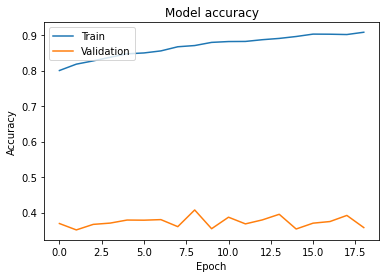

In [121]:
import matplotlib.pyplot as plt

# plot training and validation accuracy vs epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# save plot as png file
plt.savefig("accuracy_plot.png", dpi=500)

In [122]:
import matplotlib.pyplot as plt

# plot training and validation Loss vs epochs
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# save plot as png file
plt.savefig("loss_plot.png", dpi=500)

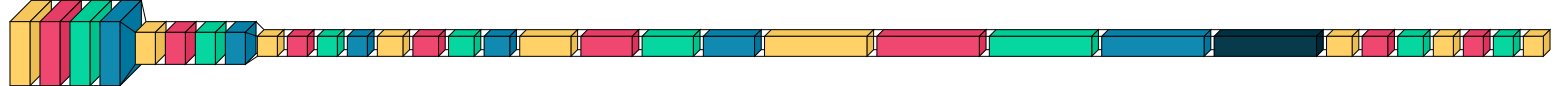

AttributeError: 'NoneType' object has no attribute 'layers'

In [123]:
# Visualize the Model

model = visualkeras.layered_view(model).show()
visualkeras.layered_view(model, legend="True", to_file='output.png') 
visualkeras.layered_view(model, to_file='output.png').show()

In [91]:
type(model)

NoneType